## My part of the Code so far has been the part to connect to the data set, cleaning it up and present it on a map the GRAND LARCENY location in the New York City heat map.

In [30]:
#Leandro Coimbra CIS 9590 Group 5 project

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
import math
import seaborn as sns; sns.set()
import osmapi
import smopy
from datetime import datetime

%matplotlib inline

In [ ]:
#read in already cleaned up data

dataset = pd.read_csv('/Users/leandro/Desktop/Baruch/MONDAY CIS-9590 DEVPRO/Data/NYPD_Complaint_Data_Current__Year_To_Date_.csv')
dataset.head(4)

NameError: name 'pd' is not defined

In [ ]:
dataset['CMPLNT_FR_DT'] = pd.to_datetime(dataset['CMPLNT_FR_DT'],format = '%m/%d/%Y',errors='coerce')
dataset.index = dataset['CMPLNT_FR_DT']
dataset[dataset.OFNS_DESC == 'GRAND LARCENY']

NameError: name 'pd' is not defined

In [33]:
# for year in range(2020,2021):
#     for month in range(1, 13):
finalSet = dataset[['CMPLNT_NUM']] 

In [34]:
count = []
for year in range(2020,2021):
    for month in range(1, 13):
        date_str = str(year) + '-' + str(month)
        newSet = dataset[date_str]
        total = newSet['CMPLNT_NUM'].sum()
        count.append(total)

/var/folders/d1/8bzp2f9s0s32v4vgz09ql5pm0000gn/T/ipykernel_8403/3952625595.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  newSet = dataset[date_str]


In [35]:
finalSet['2021-12-31']

/var/folders/d1/8bzp2f9s0s32v4vgz09ql5pm0000gn/T/ipykernel_8403/129101859.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  finalSet['2021-12-31']


,CMPLNT_NUM
CMPLNT_FR_DT,
2021-12-31,343492252
2021-12-31,237523345
2021-12-31,495496948
2021-12-31,822360567
2021-12-31,330713178
...,...
2021-12-31,114584198
2021-12-31,900415368
2021-12-31,115162604


In [36]:
#aggregate locations

#number of grids on x-axis (starting at 1)
resX = 200;
#number of grids on y-axis
resY = 200;

#identify the x,y edges of the data
x_max = dataset['X_COORD_CD'].max()
x_min = dataset['X_COORD_CD'].min()
y_max = dataset['Y_COORD_CD'].max()
y_min = dataset['Y_COORD_CD'].min()

xCoordinate = dataset['X_COORD_CD']
yCoordinate = dataset['Y_COORD_CD']

#distances along x and y axis
rangeX = x_max - x_min
rangeY = y_max - y_min

#linear transformations
kX = (resX-1)/rangeX
cX = x_min*kX -1
newX = round(kX * xCoordinate - cX)
kY = (resY-1)/rangeY
cY = y_min*kY -1
newY = round(kY * yCoordinate - cY)

newX = newX.astype(int)
newY = newY.astype(int)

dataset['New_X_Coor'] = newX
dataset['New_Y_Coor'] = newY

In [37]:
#make frequency matrix for heat map generation
count  = np.zeros((resX, resY))
for i in range (0,len(newX)):
    x = newX[i] -1
    y = newY[i] -1
    count[x][y] = count[x][y] + 1
    

In [38]:
smopy.TILE_SERVER = "http://tile.basemaps.cartocdn.com/light_all/{z}/{x}/{y}@2x.png"
#smopy.TILE_SIZE = 512
latMax = dataset['Latitude'].max()
latMin = dataset['Latitude'].min()
lonMax = dataset['Longitude'].max()
lonMin = dataset['Longitude'].min()
map = smopy.Map((latMin, lonMin, latMax, lonMax))

Lowered zoom level to keep map size reasonable. (z = 10)


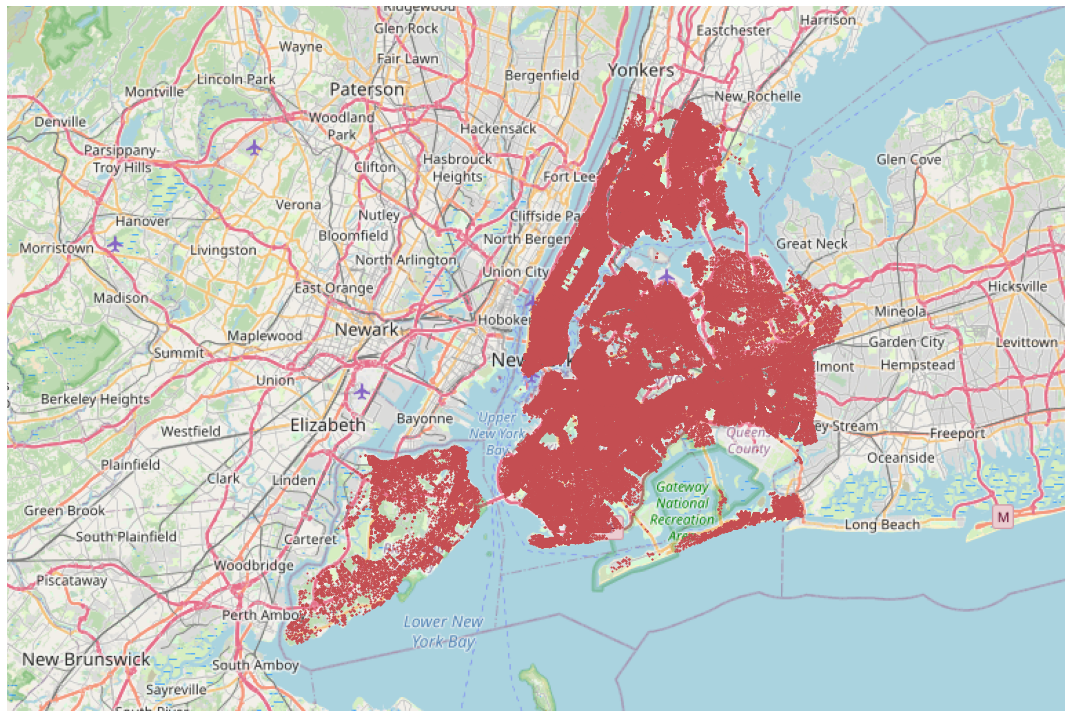

In [39]:
x, y = map.to_pixels(dataset['Latitude'], dataset['Longitude'])
ax = map.show_mpl(figsize=(15, 15))
ax.plot(x, y, 'or', ms=1, mew=1);